**Task 1:- Titanic Survival Prediction**

By **Vishwajit Singh**

August Batch 2 

Aim:- To build a model that predicts whether a passenger on the Titanic survived or not.

Dataset info:- Dataset containing Titanic Survival data and this dataset is taken from Kaggle as mention in pdf.

Importing Image from Url by using necessary library:-

In [58]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/fATVVQfFyU0/maxresdefault.jpg")

**Importing all necessary libraries for Exploratory Data Anaylsis:-**

In [59]:
# Importing required libraries for analysis the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

**Load the dataset:-**

In [60]:
Titanic_dataset = pd.read_csv("G:/VS_Code/CODSOFT_Tasks/Titanic_Survival_Prediciton/tested.csv")      # reading csv file by usnig pandas

In [61]:
Titanic_dataset.head()      # by using head it reads first 5 rows of dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
Titanic_dataset.tail()      # by usnig tail it reads last 5 rows of dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [63]:
Titanic_dataset.shape       # Check the number of rows and columns

(418, 12)

In [64]:
Titanic_dataset.columns.values      # Check the columns attribute's name

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [65]:
Titanic_dataset.dtypes      # Check the data type of columns of dataset

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
Titanic_dataset.describe()      # Check the descriptive statistics of numeric variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [67]:
Titanic_dataset['Survived'].value_counts()      #Check the value count of column 'Survived'

Survived
0    266
1    152
Name: count, dtype: int64

In [68]:
100*Titanic_dataset['Survived'].value_counts()/len(Titanic_dataset['Survived'])     #Convert the value count of column 'Survived' into percentage

Survived
0    63.636364
1    36.363636
Name: count, dtype: float64

In [69]:
Titanic_dataset.info(verbose = True)        # Display summary or information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Handling Missing Values:-**

In [70]:
Titanic_dataset.isnull()        # Check the null values in dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


**Missing Value Treatement:-**

In [71]:
Titanic_dataset['Age'] = Titanic_dataset['Age'].fillna(Titanic_dataset['Age'].mean())       # by finding mean and using mean value to fill null places in dataset
Titanic_dataset['Fare'] = Titanic_dataset['Fare'].fillna(Titanic_dataset['Fare'].mean())

In [72]:
Embarked = Titanic_dataset['Embarked'].unique()     # to read Embarked column unique values
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [73]:
Titanic_dataset['Embarked'] = Titanic_dataset['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)        # casting string to integer by using astype
Titanic_dataset['Sex'] = Titanic_dataset['Sex'].map( {'female': 1,'male':0}).astype(int)

In [74]:
Titanic_dataset.dtypes      # checking change data type of column 'Sex' and 'Embarked'

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

**Remove columns that are not required for processing:-**

In [75]:
Titanic_dataset['Age'] = Titanic_dataset['Age'].astype(int)
Titanic_dataset['Fare'] = Titanic_dataset['Fare'].astype(int)

In [76]:
data = Titanic_dataset.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)     # Drop column 'PassengerID' , 'Name' , 'Cabin' and ''Ticket'

In [77]:
Titanic_dataset.head()      # Reading new dataset after handling to null value

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


**Data Visualization**

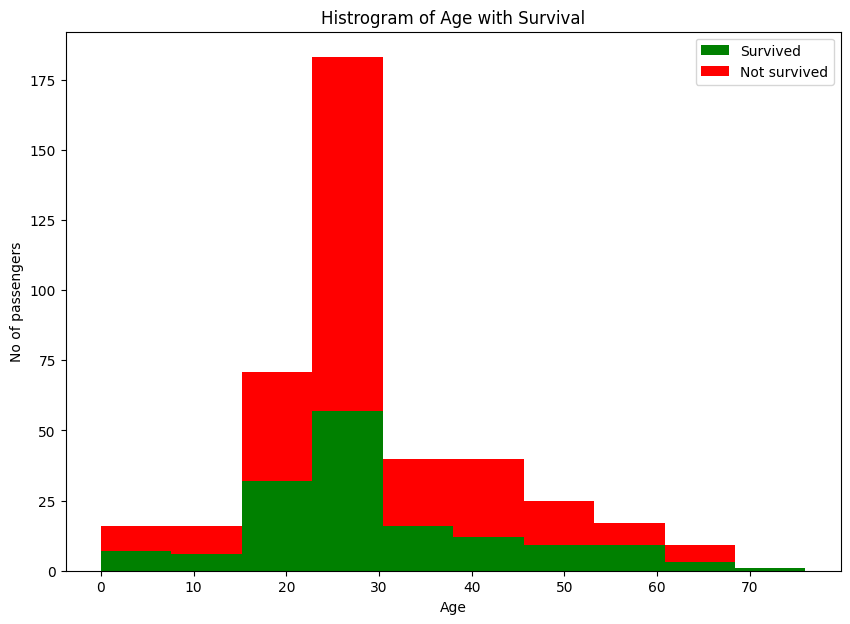

In [78]:
#visualizing the count of survivals wrt Age
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [Titanic_dataset[Titanic_dataset['Survived']==1]['Age'], Titanic_dataset[Titanic_dataset['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Histrogram of Age with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

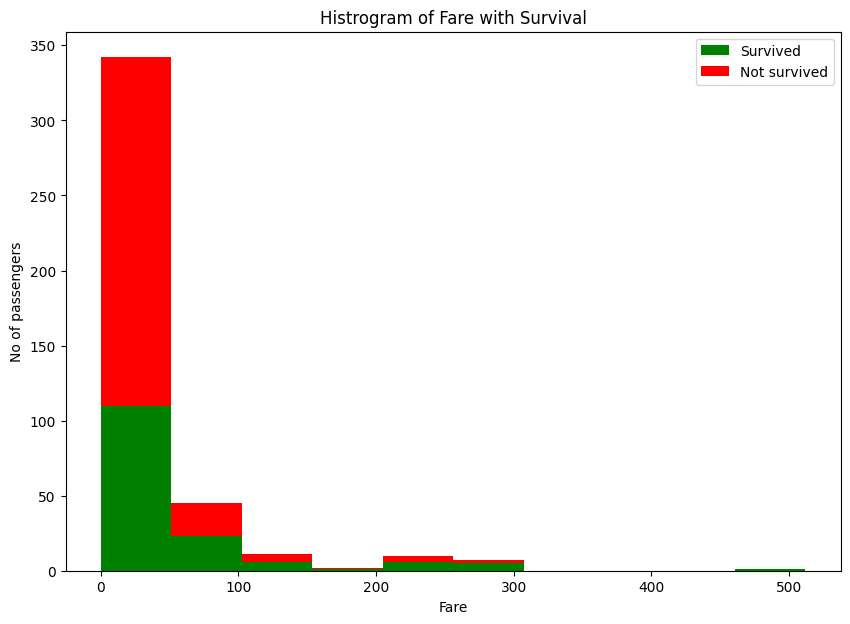

In [79]:
# visualizing the count of survivals wrt Fare
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [Titanic_dataset[Titanic_dataset['Survived']==1]['Fare'], Titanic_dataset[Titanic_dataset['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Histrogram of Fare with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

Plot distribution of Individual predictors by Survived

Text(0.5, 1.0, 'Representing Survivals wrt Pclass')

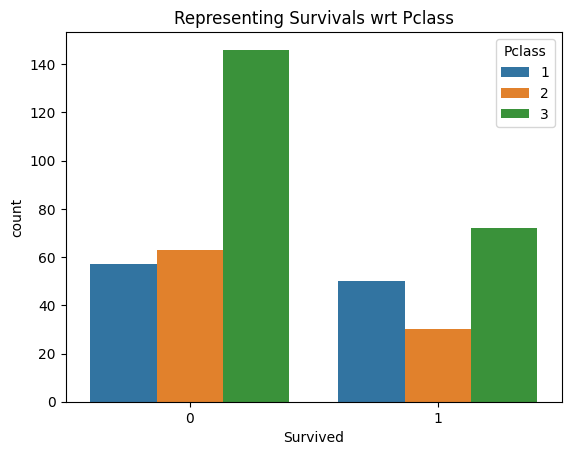

In [80]:
# visualizing the count of survivals wrt Pclass
sns.countplot(x=Titanic_dataset['Survived'],hue=Titanic_dataset['Pclass'])
plt.title('Representing Survivals wrt Pclass')

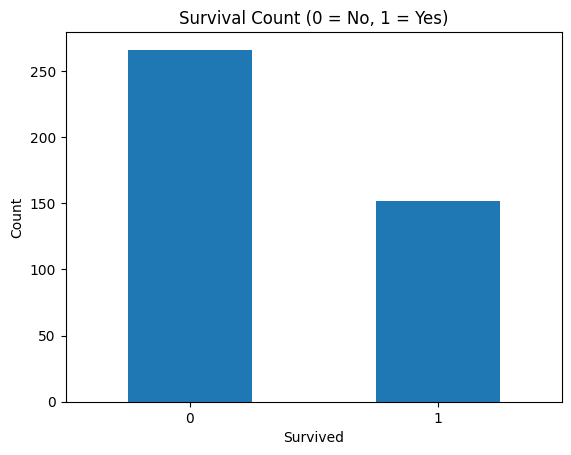

In [81]:
column = 'Survived'
# Create a bar chart
survival_counts = Titanic_dataset[column].value_counts()
survival_counts.plot(kind='bar', rot=0)
# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
# Show the plot
plt.show()

In [82]:
#function to show distribuition of variables according to survival
def vers_acc_to_surv(Titanic_dataset,colname):
    plt.figure(figsize=(5,3))
    sns.kdeplot(Titanic_dataset, x=colname, hue= 'Survived')
    plt.title(f'{colname}Distribution according to the survival')

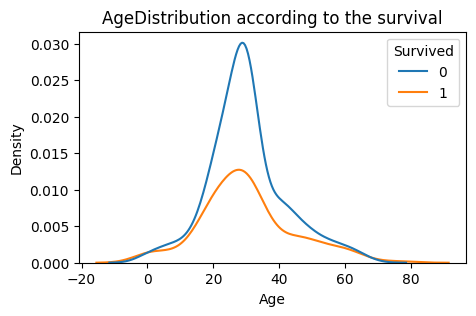

In [83]:
vers_acc_to_surv(Titanic_dataset,'Age')

In [84]:
Titanic_dataset['Sex'].unique()     # checking unique value

array([0, 1])

In [85]:
Titanic_dataset.groupby('Sex')[['Survived']].mean()    # grouping the values and checking the survival rate by gender

,Survived
Sex,
0,0.0
1,1.0


convert categorical columns into numerical ones 

In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
Titanic_dataset['Sex']= labelencoder.fit_transform(Titanic_dataset['Sex'])
Titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [87]:
Titanic_dataset.isna().sum()        # checking null values sum

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Data Modeling**

Importing all necessary libraries for modeling


In [88]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**Splitting the data**

In [89]:
Train = Titanic_dataset[['Pclass', 'Sex']]
Test = Titanic_dataset['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

Calculating the accuracy score and the prediction by using Logistic Regression:-

In [90]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred)
print(y_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 0 0]
358    0
164    0
17     0
67     0
4      1
      ..
327    0
407    0
325    0
81     0
277    0
Name: Survived, Length: 84, dtype: int64
Logistic regression accuracy: 100.00%


Calculating the Gini and the prediction by using DecisionTreeClassifier:-

In [91]:
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [92]:
clf_entropy = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth = 6, min_samples_leaf = 8)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

Checking performance of the model:-

In [93]:
y_predict = clf_entropy.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
print(accuracy_score(y_test, y_predict)*100)

100.0


In [95]:
print(classification_report(y_test, y_predict , labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [96]:
print(confusion_matrix(y_test, y_predict))

[[58  0]
 [ 0 26]]


Plotting Decision Tree:-

In [97]:
from matplotlib import pyplot as plt

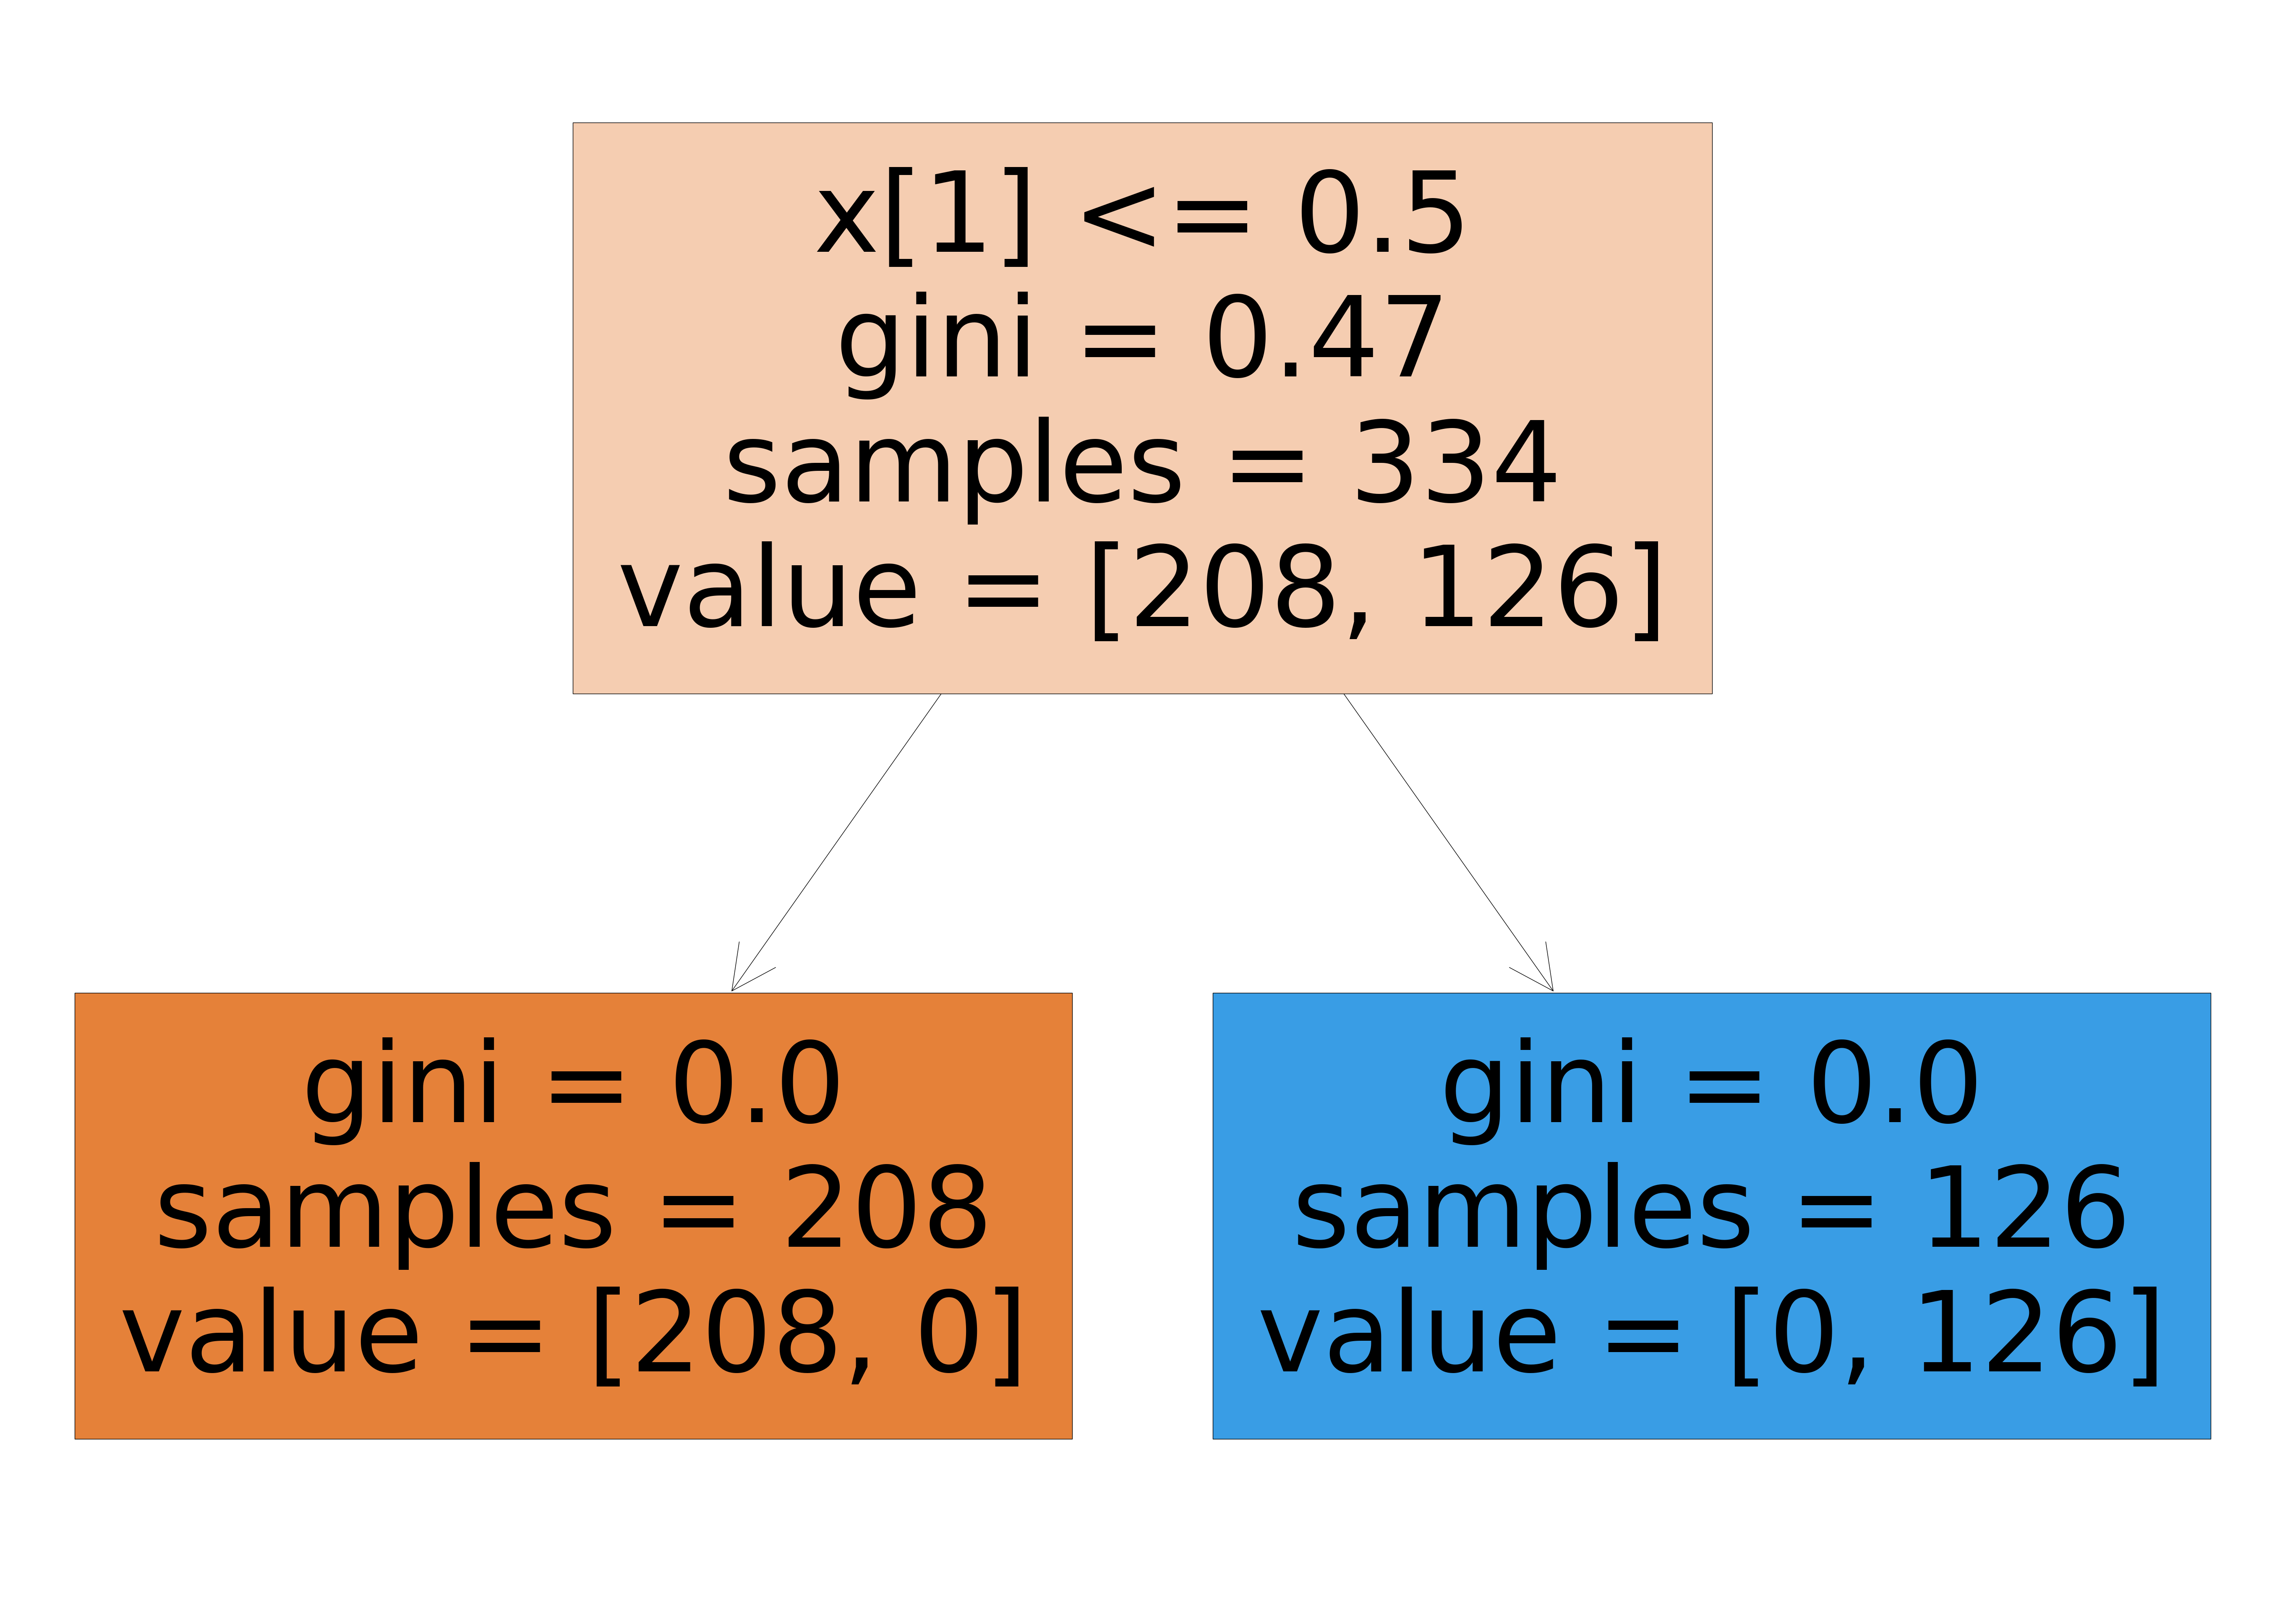

In [98]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_entropy, filled=True)
fig.savefig("Titanic_Survival_Prediciton.png")


**Random Forest Classifier:-**

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [101]:
y_pred=clf.predict(x_test)

In [102]:
print(clf.score(x_test,y_pred)*100)

100.0


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Plotting RandomForestTree:-

In [104]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

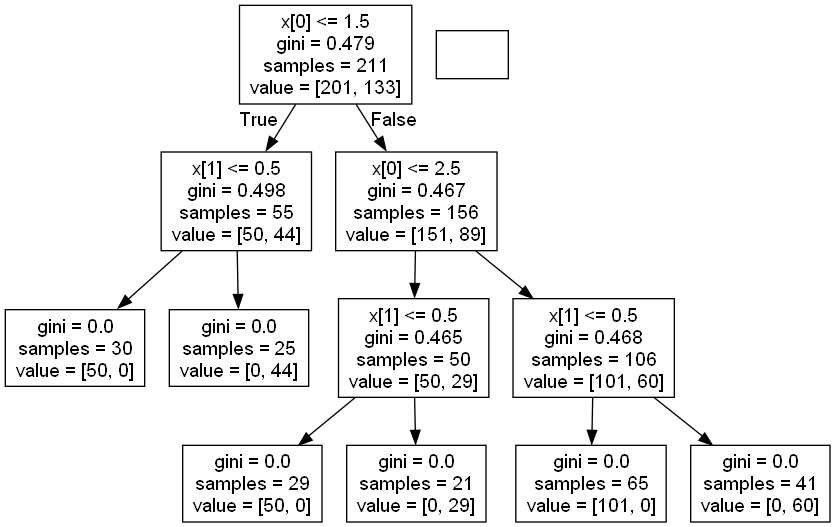

In [105]:
i_tree = 0
dot_data = StringIO()
for tree_in_forest in clf.estimators_:#rfc random forest classifier
    if (i_tree ==4):
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    i_tree = i_tree + 1
Image(graph.create_png())

**Checking the Survivals by user input using Gender and Pclass**

In [106]:
import warnings
warnings.filterwarnings('ignore')
Enter_Pclass = int(input())             # 1,2,3 is for Pclass
Enter_Male_or_Female = int(input())     # 0 for male and 1 for female
res =  LR.predict([[Enter_Pclass,Enter_Male_or_Female]])

if(res == 0):
    print( "Not Survived" )
else:
    print ( "Survived" )

Survived


**Thank You**